In [82]:
%matplotlib inline
import pickle
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
with open('../data/features.pickle', 'rb') as f:
    features = pickle.load(f, fix_imports=True, encoding='latin-1')

In [19]:
features.shape

(234842, 1026)

In [20]:
features

,photo_id,business_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_1014,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023
0,204149,3034,2.458984,2.242188,0.247192,0.508789,0.152100,0.848633,1.181641,0.109680,...,2.451172,0.000000,0.937012,0.000000,4.894531,0.000000,0.000000,0.625000,2.394531,0.111877
1,52779,2805,0.560059,3.328125,0.588867,0.251709,0.985352,0.462402,0.000000,0.155396,...,0.000000,0.035156,0.000000,0.071106,0.023056,0.042694,5.476562,0.050842,0.000000,0.000000
2,278973,485,0.163574,1.795898,0.000000,0.075623,0.297119,1.476562,0.436279,0.000000,...,0.000000,0.000000,3.218750,0.616211,1.396484,0.720703,2.599609,0.345459,1.160156,0.703125
3,195284,485,0.070740,0.254639,0.000000,0.014267,0.277344,0.975586,0.000000,3.695312,...,0.017410,4.718750,0.000000,0.000000,0.000000,0.061737,1.917969,0.078430,0.000000,0.000000
4,19992,485,0.106934,4.425781,0.000000,0.118042,0.229492,0.026108,0.238281,2.994141,...,7.421875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.185547,2.125000,0.000000
5,80748,485,0.000000,0.272705,0.345215,0.001761,0.000000,0.000000,0.002865,0.077515,...,0.000000,0.929688,0.000000,1.903320,0.006824,1.068359,0.000000,0.000000,0.159546,0.000000
6,444996,1783,0.432373,1.429688,0.065125,0.141479,1.163086,0.048737,0.401367,0.225830,...,2.603516,0.000000,0.000000,0.477539,1.971680,0.200928,0.000000,0.611816,0.134277,0.000000
7,200285,35,1.185547,1.336914,0.168823,0.000000,0.000000,0.079407,0.211426,0.057343,...,0.000000,0.000000,0.000000,0.000000,2.121094,0.000000,0.000000,0.000000,0.000000,0.000000
8,90572,35,1.133789,1.507812,1.856445,0.004646,0.356689,0.185425,0.189209,0.133789,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111511,0.000000,0.000000
9,27565,1313,2.794922,0.262207,0.182007,0.315918,2.050781,0.000000,0.714355,0.000000,...,0.020660,0.000000,0.000000,0.000000,0.153076,0.000000,0.000000,1.154297,0.000000,0.000000


In [204]:
pca = PCA(n_components=16)
sample = features.sample(n=10000)
del sample['photo_id']
del sample['business_id']

In [205]:
pca.fit(sample)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

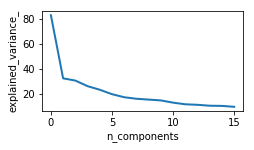

In [206]:
plt.figure(1, figsize=(4, 2))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

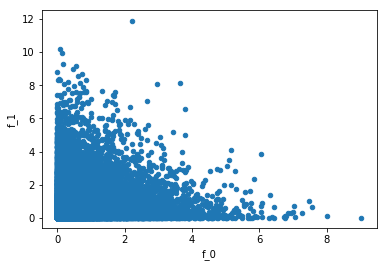

In [207]:
sample.plot.scatter(x='f_0', y='f_1')

In [208]:
pca_sample = pca.transform(sample)
pca_sample.shape

(10000, 16)

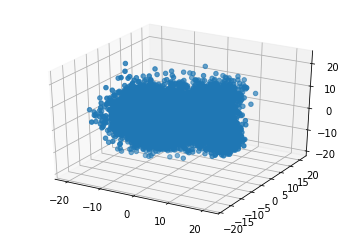

In [209]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_sample[:,0], ys=pca_sample[:,1], zs=pca_sample[:,2])

In [147]:
import sklearn.neighbors as neighbors

In [214]:
# See http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree
tree = neighbors.KDTree(pca_sample)

In [217]:
#q = sample.iloc[2].values.reshape(1, -1)
q = pca_sample[123].reshape(1, -1)
print(q.shape)
print(pca_sample.shape)
dist, ind = tree.query(q, k=50)

(1, 16)
(10000, 16)


In [243]:
ind.shape

(1, 50)

(50,)


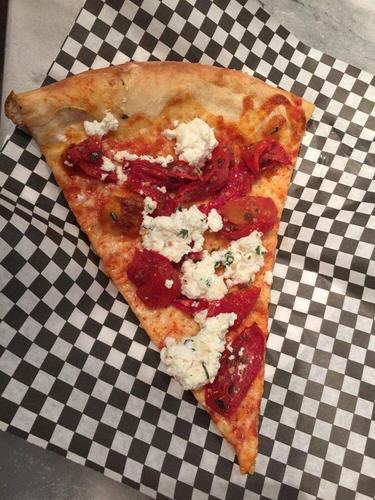

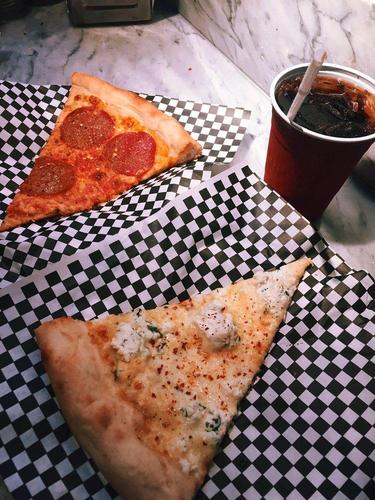

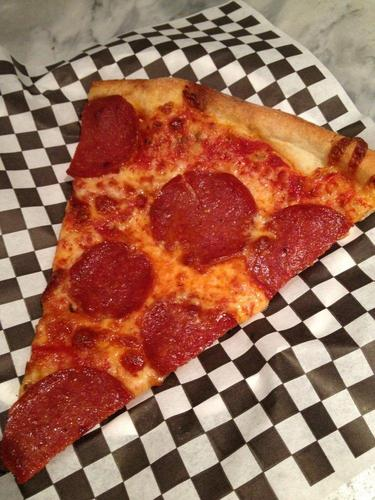

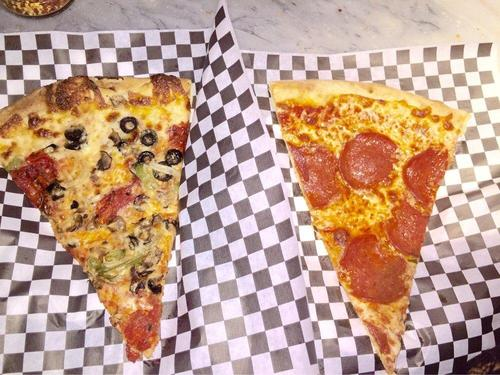

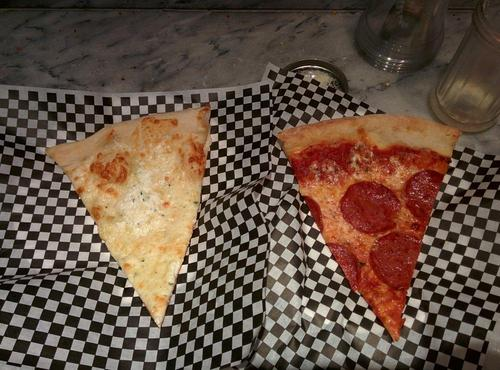

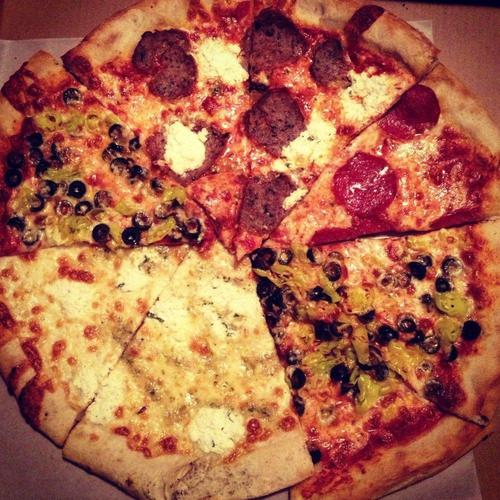

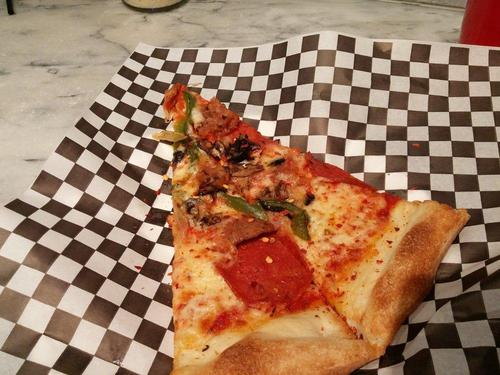

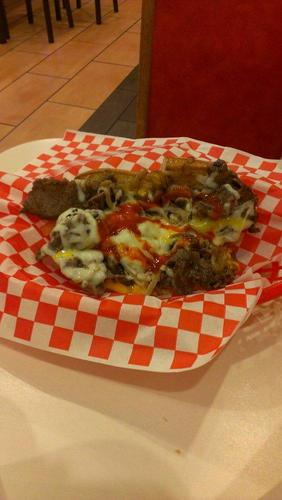

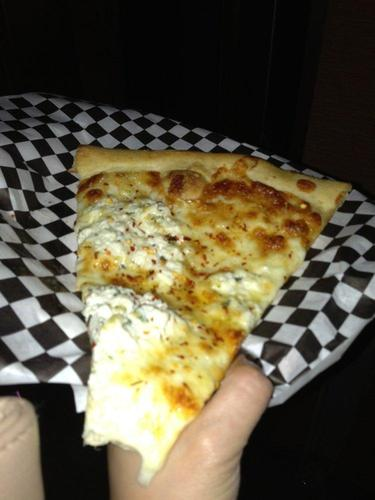

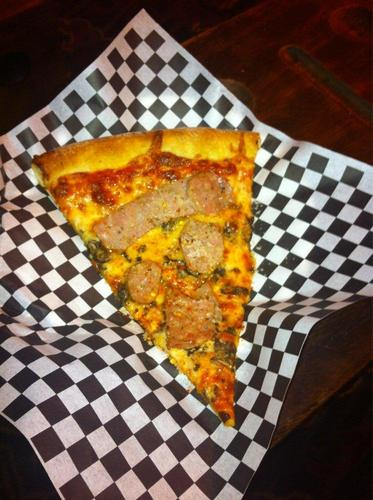

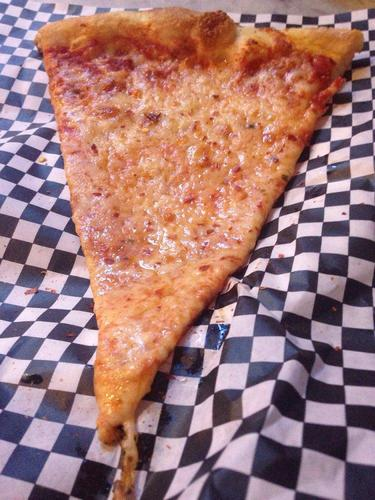

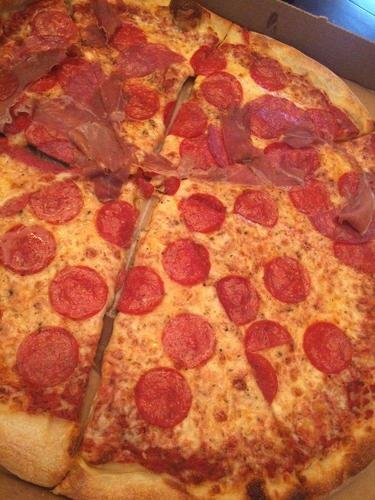

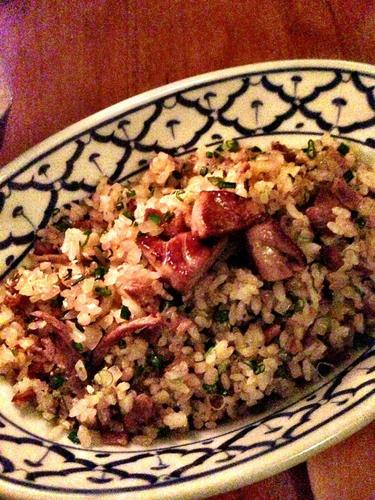

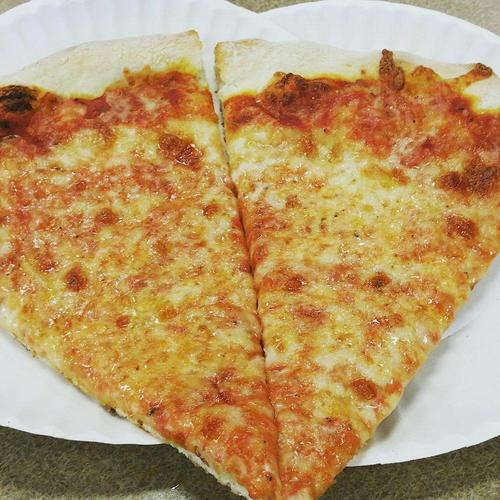

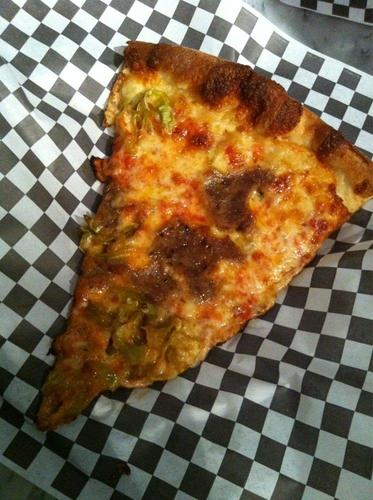

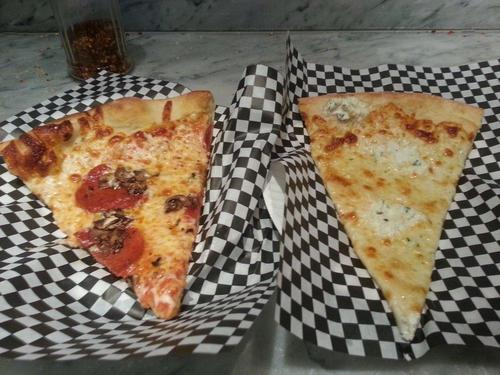

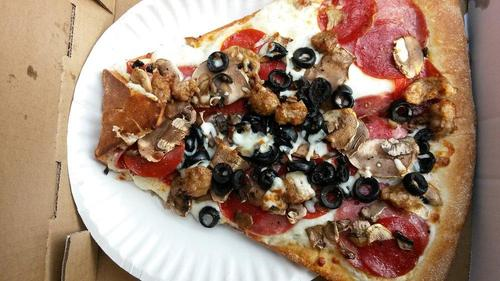

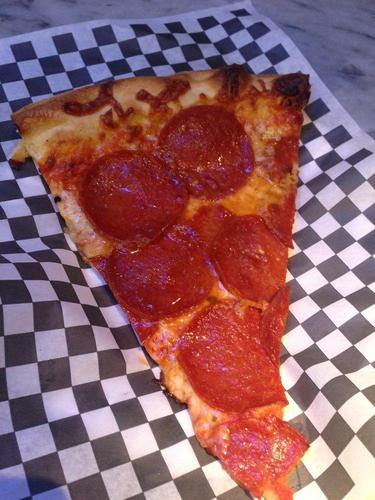

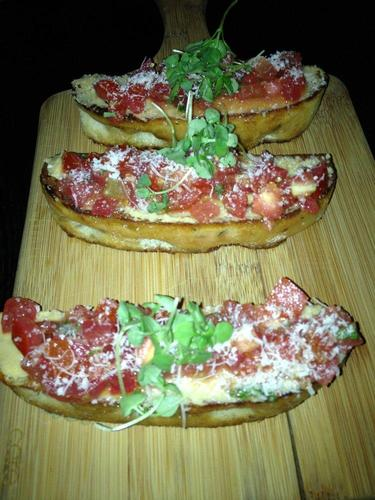

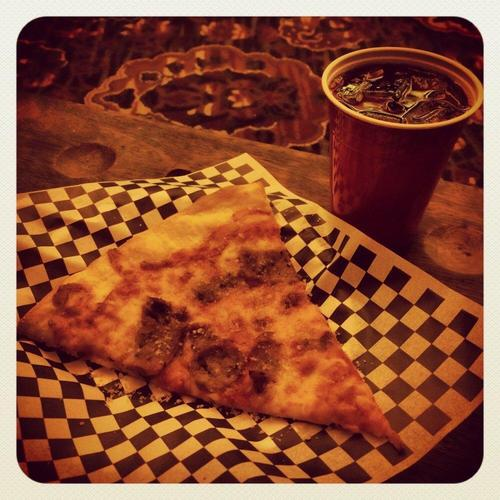

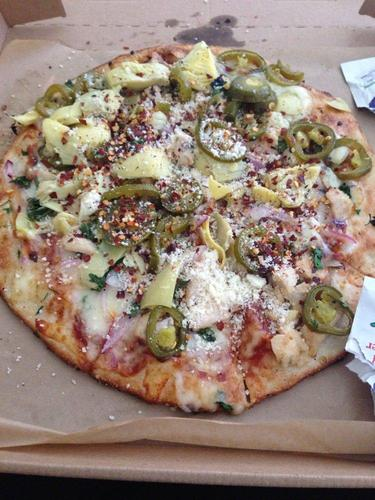

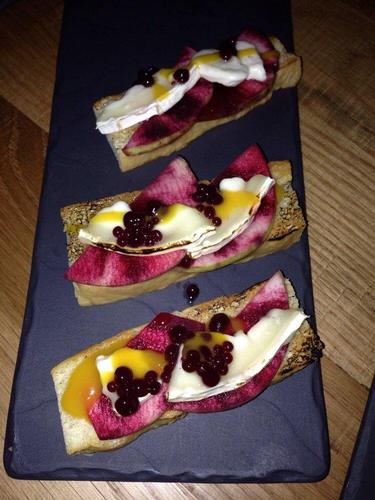

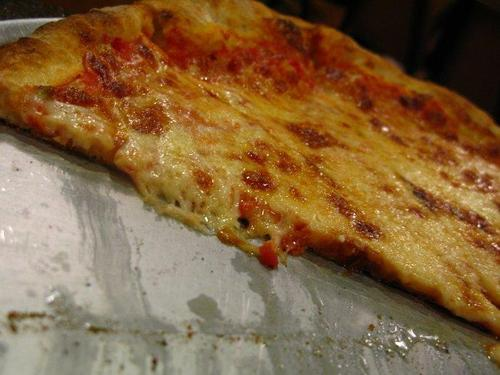

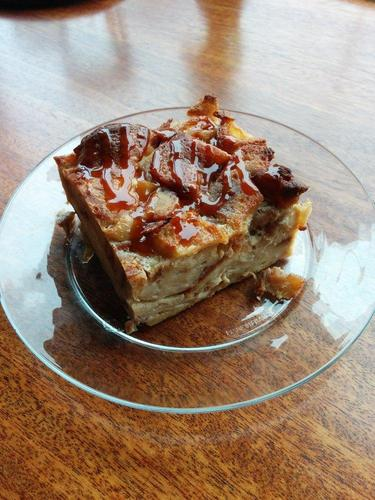

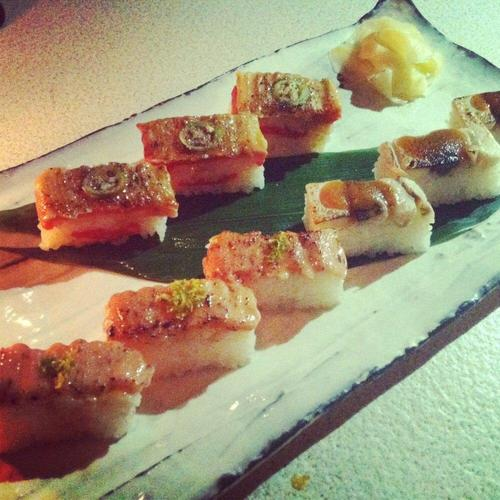

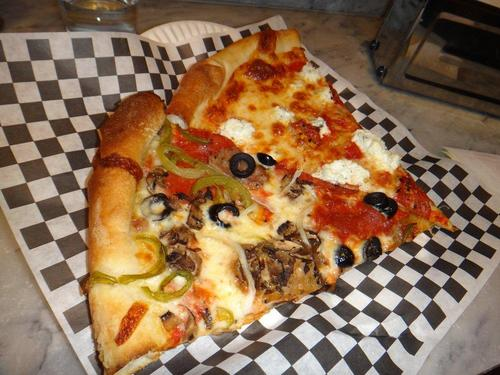

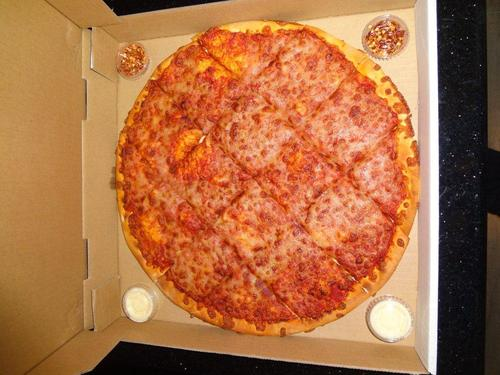

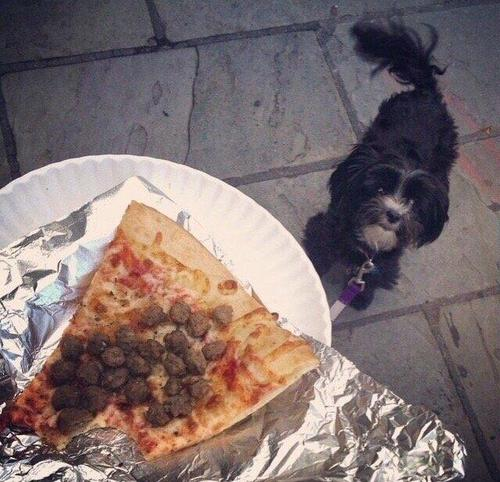

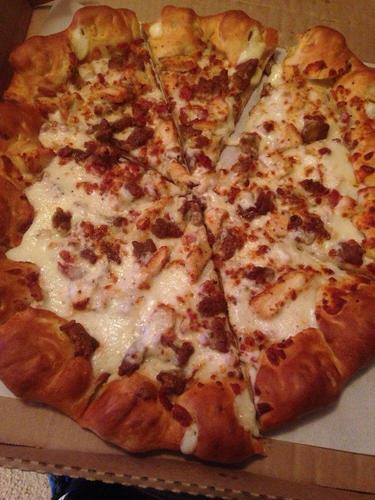

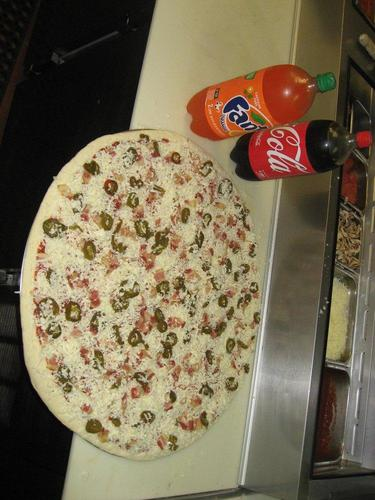

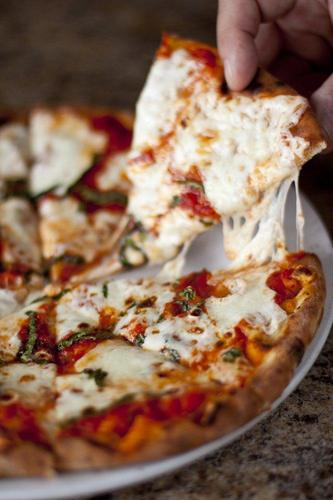

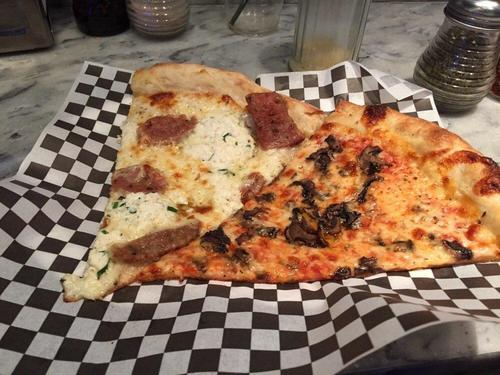

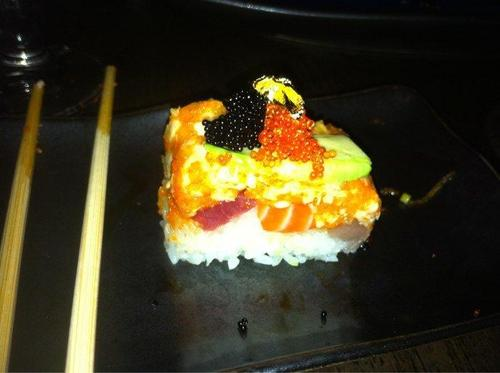

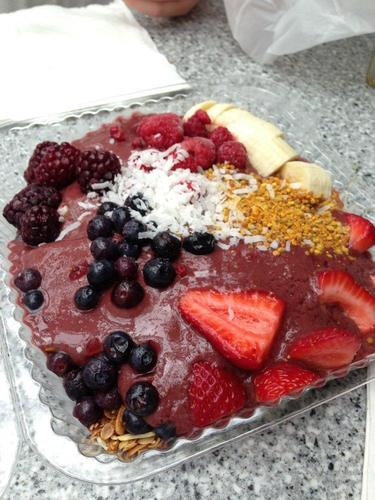

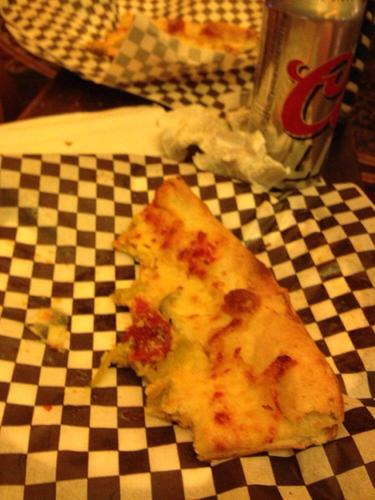

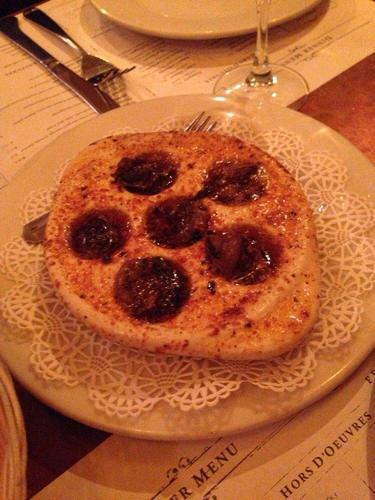

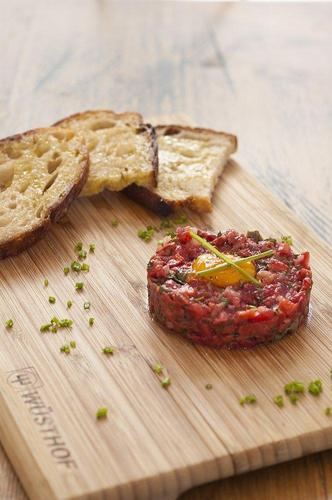

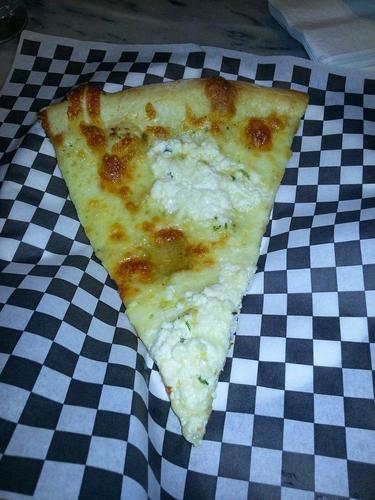

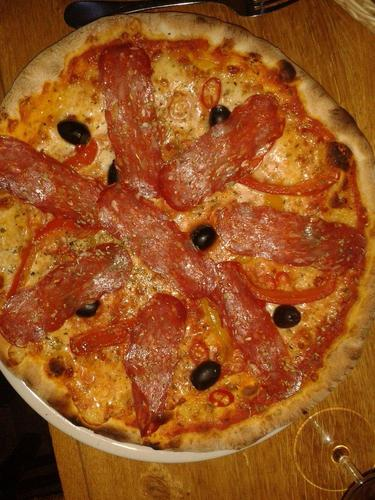

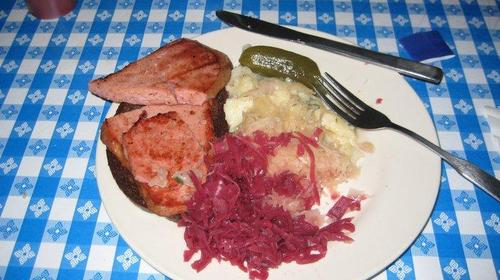

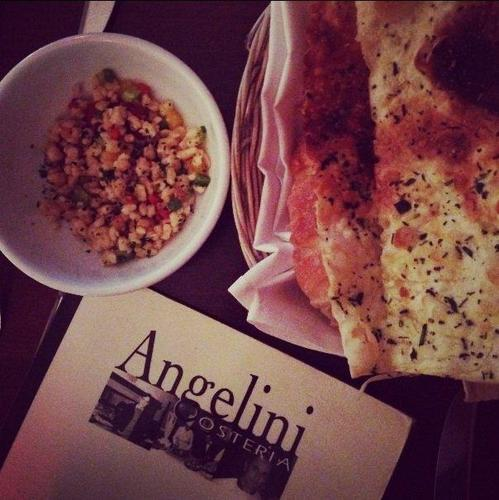

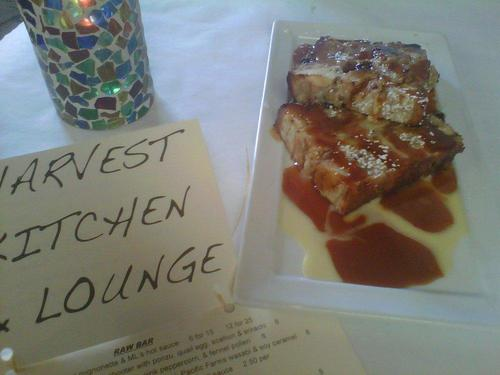

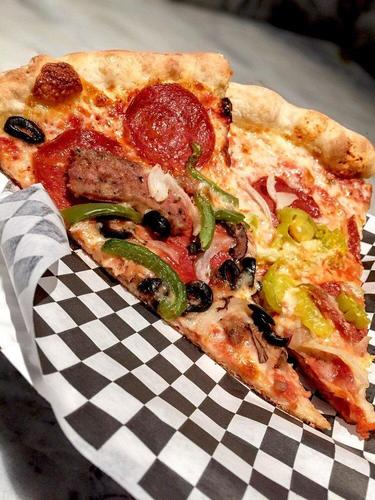

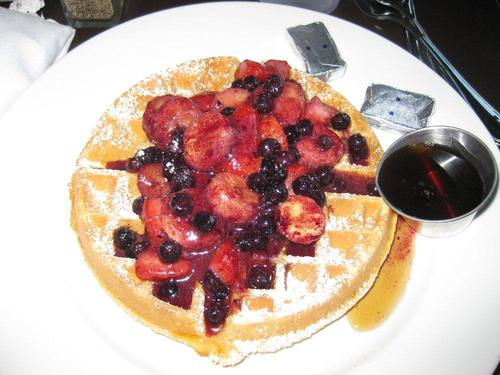

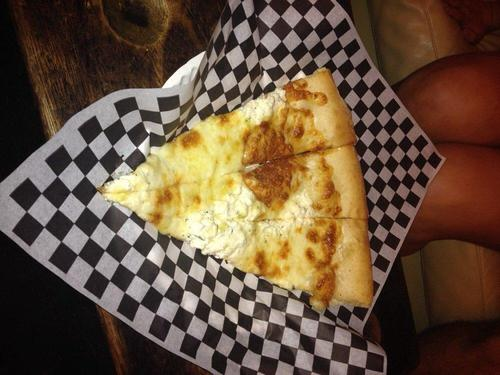

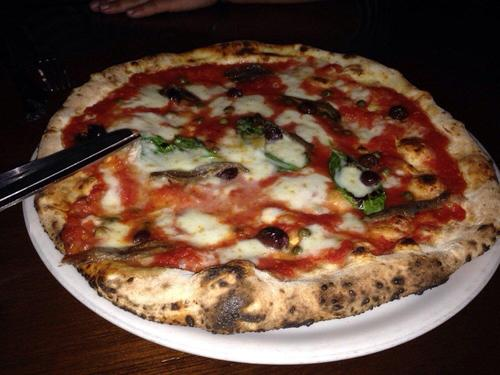

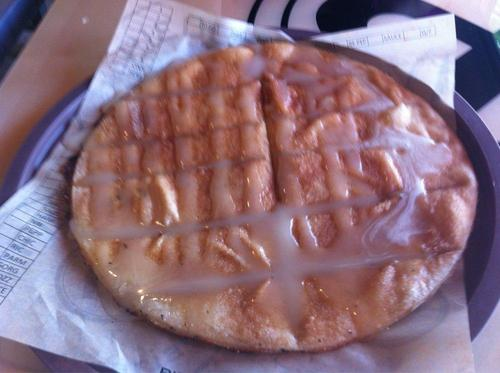

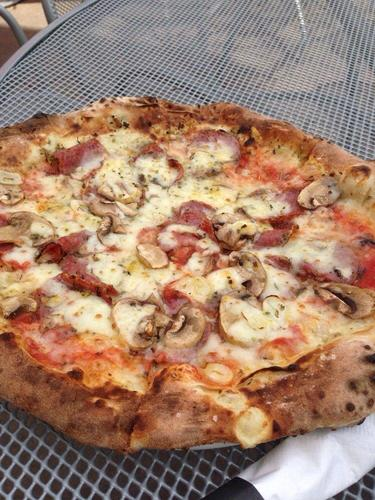

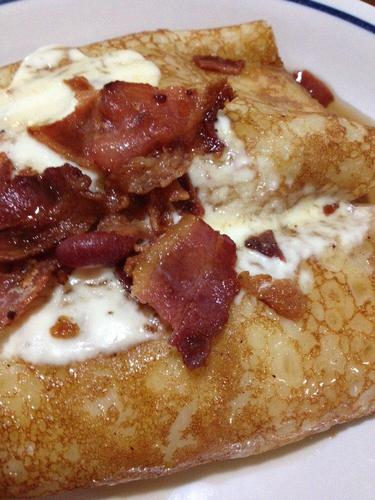

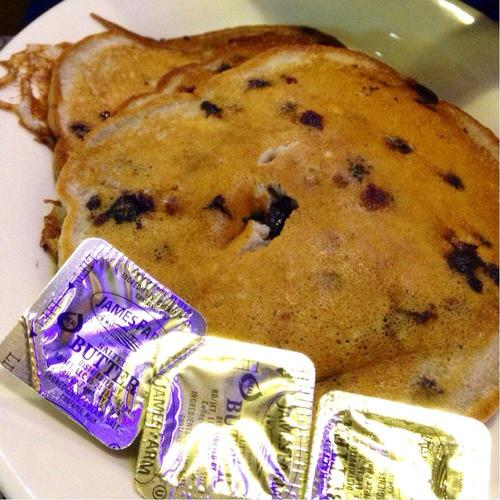

In [251]:
from IPython.display import Image, display

photos = features.loc[sample.iloc[ind[0]].index].photo_id.values
print(photos.shape)

for img in photos:
     display(Image(filename="../data/train_photos/" + str(img) + ".jpg"))
    #plt.imshow("")
    #plt.axis('off')
    #if i == 0:
    #    plt.title(cls)
#plt.show()